# Modelling and Evaluation Notebook

## Objectives

This notebook meets Business Requirements 1, 2, and 7:
1. Automated Pizza Detection
* Train a machine learning model capable of automatically classifying images as either containing pizza or not-pizza.
* Utilize appropriate image classification algorithms and architectures suitable for the binary classification task.
* Evaluate the model's ability to reduce the time and effort required for manual image inspection.
  
2. Prediction Accuracy
* Define the minimum acceptable accuracy based on the client's requirements.
* Train the model on the dataset and assess its accuracy on both the training and validation sets.
* Fine-tune the model to achieve the specified accuracy threshold.
* Utilize evaluation metrics such as precision, recall, and F1 score to provide a comprehensive understanding of the model's predictive performance.
  
7. Continuous Improvement
* Implement a system for continuous improvement and model retraining.
* Assess the model's adaptability to changes in image data patterns.
* Showcase the process of model retraining and its impact on maintaining high prediction accuracy over time.

## Key Steps
1. Data Loading and Preprocessing:
* Load the pizza dataset and perform data augmentation techniques to enhance model generalization.
* Verify the dataset in the training, validation, and test sets.

2. Model Selection and Training:
* Choose an appropriate machine learning model or algorithm for image classification.
* Train the model on the training set, utilizing validation set for hyperparameter tuning.

3. Evaluation Metrics:
* Calculate and display key evaluation metrics such as accuracy, precision, recall, and F1 score.
* Utilize confusion matrices to provide insights into the model's performance.

4. Model Fine-Tuning:
* Fine-tune the model based on the evaluation results to meet the defined accuracy threshold.

5. Continuous Improvement Process:
* Showcase the implemented process for continuous improvement and model retraining.
* Demonstrate how the model adapts to changes in image data patterns over successive retraining cycles.

6. Visualization of Learning Curves:
* Generate learning curves to visually represent the model's training and validation performance over epochs.
* Analyze the curves to identify trends and patterns in the model's learning process.

7. Model Testing:
* Evaluate the final model on the test set to ensure its generalization to new, unseen data.

## Inputs

* inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza/train
* inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza/test
* inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza/validation
* image shape embeddings.

## Outputs
* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image files. Prediction on the random image filns

---

# Import regular packages

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

# Set Working Directory

In [11]:
cwd= os.getcwd()

In [12]:
os.chdir('/workspaces/pizza-not-pizza')
print("You set a new current directory")

You set a new current directory


In [13]:
work_dir = os.getcwd()
work_dir

'/workspaces/pizza-not-pizza'

---

## Set input directories

In [14]:
my_data_dir = 'inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [15]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [16]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['pizza', 'not_pizza']


## Set image shape

In [17]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

# Number of images in train, test and validation data

* train - pizza: 688 images
* train - not_pizza: 688 images
* validation - pizza: 98 images
* validation - not_pizza: 98 images
* test - pizza: 197 images
* test - not_pizza: 197 images




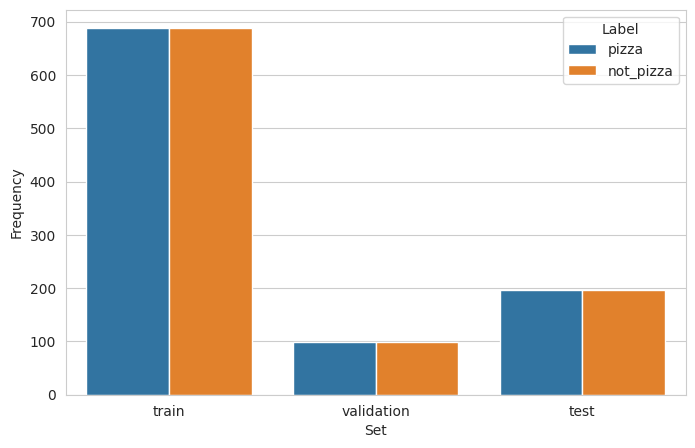

In [18]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        # Append a new row to the DataFrame with Set (folder), Label, and Frequency
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        # Print the number of images for each folder-label combination
        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

# Create a bar plot to visualize label distribution
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')

# Save the plot as an image
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)

plt.show()

---

# Image data augmentation

---

### ImageDataGenerator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* ### Initialize ImageDataGenerator

In [20]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

* ### Augment training image dataset

In [32]:
batch_size = 16  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 1376 images belonging to 2 classes.


{'not_pizza': 0, 'pizza': 1}

* ### Augment validation image dataset

In [33]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 196 images belonging to 2 classes.


{'not_pizza': 0, 'pizza': 1}

* ### Augment test image dataset

In [34]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 394 images belonging to 2 classes.


{'not_pizza': 0, 'pizza': 1}

## Plot augmented training image

(16, 256, 256, 3)


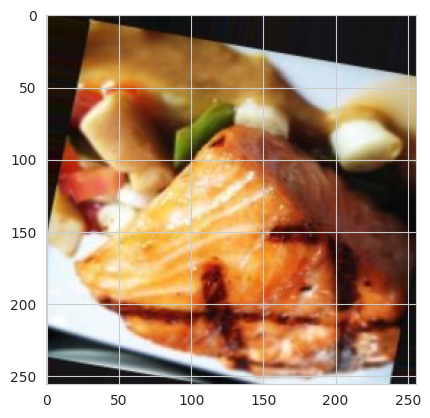

(16, 256, 256, 3)


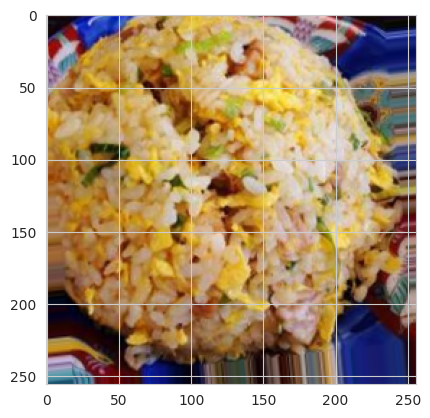

(16, 256, 256, 3)


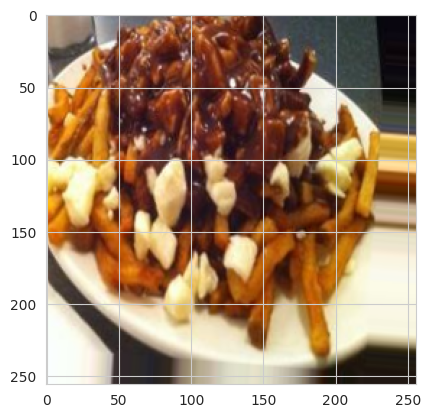

In [35]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation and test images

(16, 256, 256, 3)


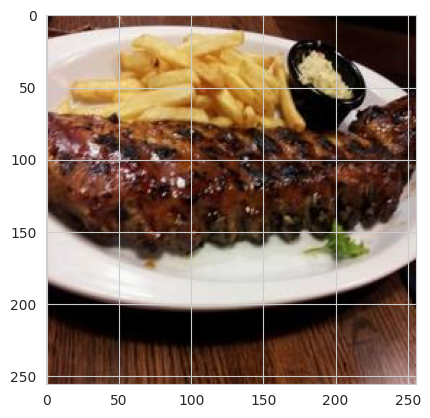

(16, 256, 256, 3)


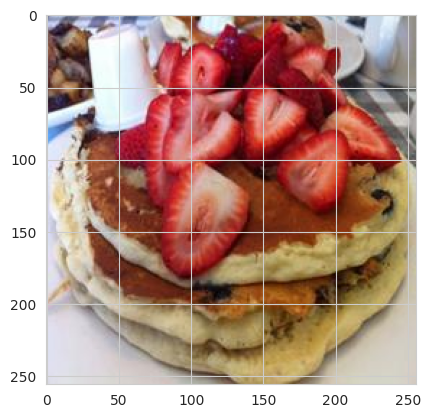

(16, 256, 256, 3)


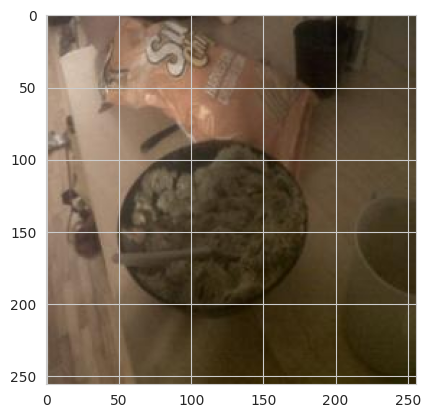

In [36]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(16, 256, 256, 3)


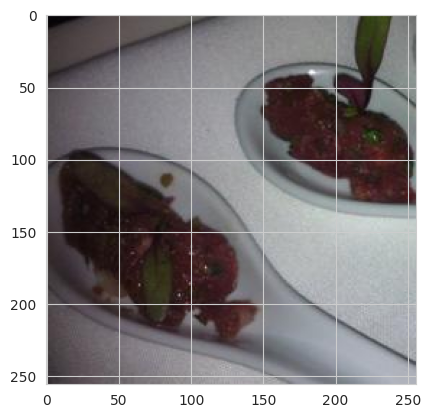

(16, 256, 256, 3)


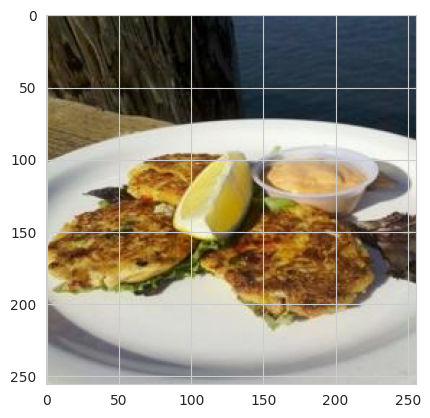

(16, 256, 256, 3)


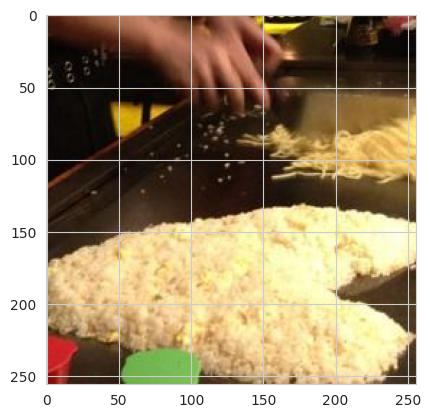

In [37]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [38]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model creation

---

## ML model

* ### Import model packages

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.regularizers import l2

* ### Model 

In [40]:
# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)

# Customize the top layers for binary classification task
x = base_model.output
x = Flatten()(x)

# Add a Dense layer
x = Dense(16, activation='relu')(x)

# Add a Dropout layer
x = Dropout(0.5)(x)

predictions = Dense(1, activation='sigmoid')(x)

# Create a new model by combining the base model and custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model - changing from 0.001 to 0.0001
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
callbacks = [early_stop, checkpoint]

# Fit and Train the model with the data
model.fit(train_set, 
          epochs=5, 
          steps_per_epoch=len(train_set.classes) // batch_size, 
          validation_data=validation_set, 
          callbacks=[early_stop], 
          verbose=1)

Epoch 1/5
86/86 [==============================] - 725s 8s/step - loss: 1.3009 - accuracy: 0.6679 - val_loss: 1.0375 - val_accuracy: 0.8061
Epoch 2/5
86/86 [==============================] - 678s 8s/step - loss: 1.0167 - accuracy: 0.7798 - val_loss: 0.8674 - val_accuracy: 0.8571
Epoch 3/5
86/86 [==============================] - 691s 8s/step - loss: 0.9155 - accuracy: 0.8009 - val_loss: 0.7893 - val_accuracy: 0.8418
Epoch 4/5
86/86 [==============================] - 701s 8s/step - loss: 0.8334 - accuracy: 0.8314 - val_loss: 0.7409 - val_accuracy: 0.8622
Epoch 5/5
86/86 [==============================] - 690s 8s/step - loss: 0.7918 - accuracy: 0.8394 - val_loss: 0.6789 - val_accuracy: 0.8878


## Save model

In [41]:
# Add model summary
model.save('outputs/v1/pizza_detector_model.h5')

---

# Model Performace

---

## Model learning curve

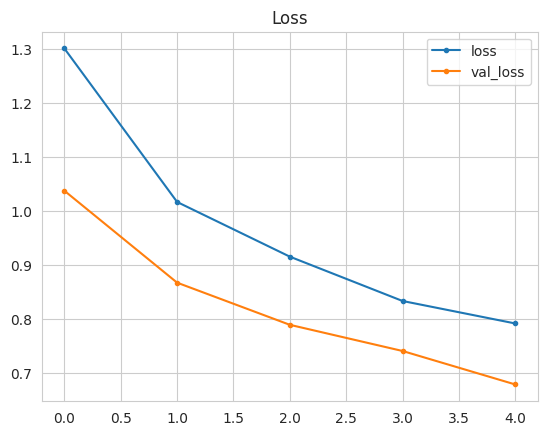

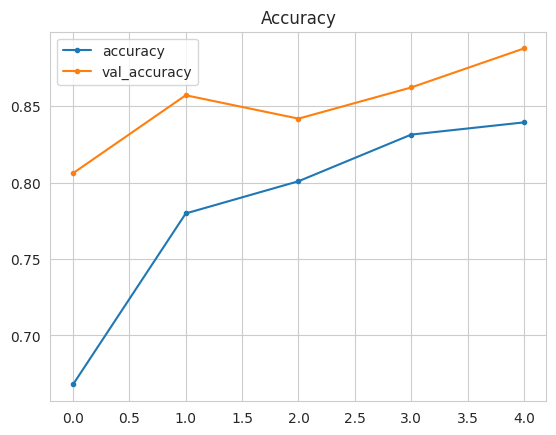

In [42]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")

# Plot training and validation loss values
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")

# Save the loss plot as an image
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)

plt.show()

# Print a newline for separation
print("\n")

# Plot training and validation accuracy values
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")

# Save the accuracy plot as an image
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)

plt.show()

## Model Evaluation

Load saved model:

In [43]:
from keras.models import load_model
model = load_model('outputs/v1/pizza_detector_model.h5')

Evaluate model on test set:

In [44]:
evaluation = model.evaluate(test_set)

25/25 [==============================] - 168s 7s/step - loss: 0.7276 - accuracy: 0.8579


### Save evaluation pickle

In [45]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Predict on new data

Load a random image as PIL:

Image shape: (256, 256), Image mode: RGB


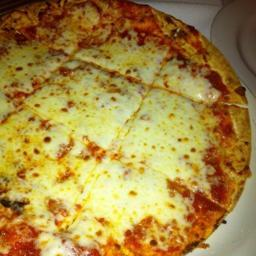

In [46]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select Pizza or not Pizza

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction:

In [47]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities:

In [48]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.96352696
pizza


---

# Push files to Repo

* .gitignore

In [34]:
#Adds Test and Train datasets to gitignore so as to not overload either Github or Heroku.
!cat .gitignore

* Git status

In [35]:
!git status

* Git add

In [36]:
!git add .

* Git commit

In [37]:
!git commit -m "Add new plots"

* Git Push

In [38]:
!git push